## Test Corpus

In [9]:
import requests 
import json
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import os, sys
path_gutenberg = os.path.join(os.pardir,os.pardir,'gutenberg')
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
! pip install dataIO
%load_ext autoreload
%autoreload 2
src_dir = os.path.join(os.pardir,'src')
sys.path.append(src_dir)
import nltk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.axes as axes

Error processing line 1 of /opt/anaconda3/lib/python3.8/site-packages/protobuf-3.14.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "/opt/anaconda3/lib/python3.8/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
internationalCorpDF = pd.read_csv('/Users/ashleycullina/Downloads/internationalRomanceCorpus.csv')
internationalCorpDF

,Unnamed: 0,date,location,author,filename,title
0,0,1820,Ireland,"Maturin, Charles",53685-0.txt,Melmoth the Wanderer
1,1,1822,Scotland,"Galt, John",44573-0.txt,"The Entail; or, The Lairds of Grippy"
2,2,1822,England,"Peacock, Thomas Love",966-0.txt,Maid Marian
3,3,1824,England,"Gore, Catherine",9387-0.txt,"Theresa Marchmont, or, the Maid of Honour: A Tale"
4,4,1822,Scotland,"Scott, Walter",pg42389.txt,The Pirate
5,5,1823,Scotland,"Scott, Walter",7853-0.txt,Quentin Durward
6,6,1832,Canada,"Richardson, Major",4912.txt,Wacousta : a tale of the Pontiac conspiracy (C...
7,7,1840,Canada,"Richardson, Major",5108.txt,"The Canadian Brothers; Or, The Prophecy Fulfil..."
8,8,1823,Scotland,"Galt, John",pg30749.txt,"Ringan Gilhaize, or, The Covenanters"
9,9,1831,England,"Peacock, Thomas Love",2075-0.txt,Crotchet Castle


In [147]:
! jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

Error processing line 1 of /opt/anaconda3/lib/python3.8/site-packages/protobuf-3.14.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "/opt/anaconda3/lib/python3.8/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of /opt/anaconda3/lib/python3.8/site-packages/protobuf-3.14.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "/opt/anaconda3/lib/python3.8/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
[I 13:01:45.410 NotebookApp] The port 8888 is already in use, trying another port.
[I 13:01:45.412 NotebookApp] The port 8889 is alrea

In [4]:
path = 'geographies of genre/romanceCorpTexts/'

    
def getText(bookID): 
    f = open('/Users/ashleycullina/geographies of genre/romanceCorpTexts/' + bookID , "r")
    return(f.read())
    
internationalCorpDF['Text'] = internationalCorpDF['filename'].apply(lambda x: getText(x))

In [5]:
internationalCorpDF['Text'] = internationalCorpDF['Text'].apply(lambda x: nltk.word_tokenize(x))

In [5]:
internationalCorpDF['Text'][30][900:1500]

['read',
 'the',
 'letter',
 'from',
 'his',
 'beloved',
 'uncle',
 ',',
 'that',
 'he',
 'scarcely',
 'heard',
 'this',
 'reproof',
 ',',
 'which',
 ',',
 'gentle',
 'as',
 'it',
 'was',
 ',',
 'at',
 'any',
 'other',
 'time',
 'would',
 'have',
 'clouded',
 'his',
 'handsome',
 'brow',
 'with',
 'frowns',
 '.',
 'Captain',
 'Sir',
 'Henry',
 'Stanley',
 'wrote',
 'to',
 'his',
 'brother-in-law',
 ',',
 'that',
 'he',
 'should',
 'sail',
 'in',
 'the',
 'Diomede',
 ',',
 'from',
 'Portsmouth',
 ',',
 'in',
 'less',
 'than',
 'a',
 'month',
 ';',
 'when',
 'he',
 'should',
 'expect',
 'his',
 'noble',
 'boy',
 ',',
 'his',
 'brave',
 'Robert',
 ',',
 'again',
 'to',
 'accompany',
 'him',
 'to',
 'victory',
 '.',
 '``',
 'I',
 'think',
 'it',
 'long',
 'till',
 'we',
 'are',
 'afloat',
 ',',
 "''",
 'continued',
 'he',
 ';',
 '``',
 'and',
 'so',
 ',',
 'I',
 'dare',
 'say',
 ',',
 'does',
 'my',
 'dear',
 'nephew',
 '.',
 'However',
 ',',
 'that',
 'the',
 'time',
 'may',
 'not',
 'app

In [6]:
internationalCorpDF['Text'] = internationalCorpDF['Text'].apply(lambda x: ' '.join(x))

In [7]:
internationalCorpDF['Text'] = internationalCorpDF['Text'].str.slice(5000,)

In [8]:
internationalCorpDF['Text'] = internationalCorpDF['Text'].str.strip(to_strip = '. *!? « \n\t ] _ [')

In [41]:
internationalCorpDF['Text'][12]

"\ufeff P r o j e c t G u t e n b e r g ' s V a l e n t i n e M ' C l u t c h y , T h e I r i s h A g e n t , b y W i l l i a m C a r l e t o n T h i s e B o o k i s f o r t h e u s e o f a n y o n e a n y w h e r e a t n o c o s t a n d w i t h a l m o s t n o r e s t r i c t i o n s w h a t s o e v e r . Y o u m a y c o p y i t , g i v e i t a w a y o r r e - u s e i t u n d e r t h e t e r m s o f t h e P r o j e c t G u t e n b e r g L i c e n s e i n c l u d e d w i t h t h i s e B o o k o r o n l i n e a t w w w . g u t e n b e r g . o r g T i t l e : V a l e n t i n e M ' C l u t c h y , T h e I r i s h A g e n t T h e W o r k s o f W i l l i a m C a r l e t o n , V o l u m e T w o A u t h o r : W i l l i a m C a r l e t o n I l l u s t r a t o r : M . L . F l a n e r y R e l e a s e D a t e : J u n e 7 , 2 0 0 5 [ E B o o k # 1 6 0 0 9 ] L a s t U p d a t e d : M a r c h 2 , 2 0 1 8 L a n g u a g e : E n g l i s h C h a r a c t e r s e t e n c o d i n g : U T F - 8 * * * S T A 

In [10]:
from sklearn.decomposition import PCA

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
from nltk.tokenize import RegexpTokenizer

In [13]:
tokenizer = RegexpTokenizer(r'\w+')


In [14]:
tf_vectorizer = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1))

In [15]:

corpusFreq = tf_vectorizer.fit_transform(internationalCorpDF['Text']).todense()


In [16]:
pca = PCA(n_components=2)

In [17]:
corpFreqReduced = pca.fit_transform(corpusFreq)

In [19]:
locationList = internationalCorpDF['location'].tolist()

In [18]:
len(corpFreqReduced)

60

In [20]:
titles = internationalCorpDF['title'].tolist()

In [43]:
colors_for_values = {'Canada':'red', 'Scotland':'blue', 'Ireland':'green', 'England':'purple'}

internationalCorpDF['Color'] = internationalCorpDF['location'].map(colors_for_values)

In [35]:
internationalCorpDF


,Unnamed: 0,date,location,author,filename,title,Text,Color
0,0,1820,Ireland,"Maturin, Charles",53685-0.txt,Melmoth the Wanderer,"the past , and more from the future . His uncl...",green
1,1,1822,Scotland,"Galt, John",44573-0.txt,"The Entail; or, The Lairds of Grippy","ing that a man of genius , whose fiction is so...",blue
2,2,1822,England,"Peacock, Thomas Love",966-0.txt,Maid Marian,"exhortation . “ My children , ” said he , “ if...",purple
3,3,1824,England,"Gore, Catherine",9387-0.txt,"Theresa Marchmont, or, the Maid of Honour: A Tale",e her final release from all earthly cares and...,purple
4,4,1822,Scotland,"Scott, Walter",pg42389.txt,The Pirate,little read in general may be excused for its ...,blue
5,5,1823,Scotland,"Scott, Walter",7853-0.txt,Quentin Durward,"early period , as a species of blasphemy . The...",blue
6,6,1832,Canada,"Richardson, Major",4912.txt,Wacousta : a tale of the Pontiac conspiracy (C...,"rn wilderness , beset as it was by the warrior...",red
7,7,1840,Canada,"Richardson, Major",5108.txt,"The Canadian Brothers; Or, The Prophecy Fulfil...","ter , was deemed of sufficient importance not ...",red
8,8,1823,Scotland,"Galt, John",pg30749.txt,"Ringan Gilhaize, or, The Covenanters",his jewels -- that the explanation of the negl...,blue
9,9,1831,England,"Peacock, Thomas Love",2075-0.txt,Crotchet Castle,o whose labours for the Diffusion of Useful Kn...,purple


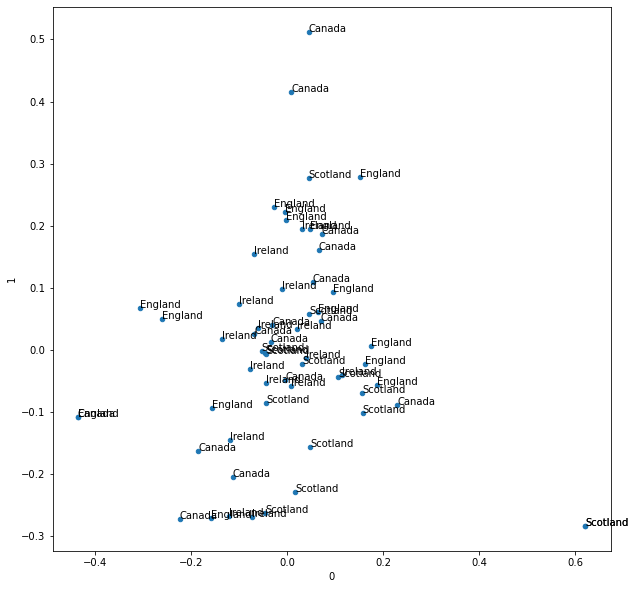

In [47]:
df = pd.DataFrame(corpFreqReduced, index=locationList)
ax = df.plot(kind='scatter', x=0, y=1, figsize=(10,10))

for title, points in df.iterrows():
    ax.annotate(title, points)

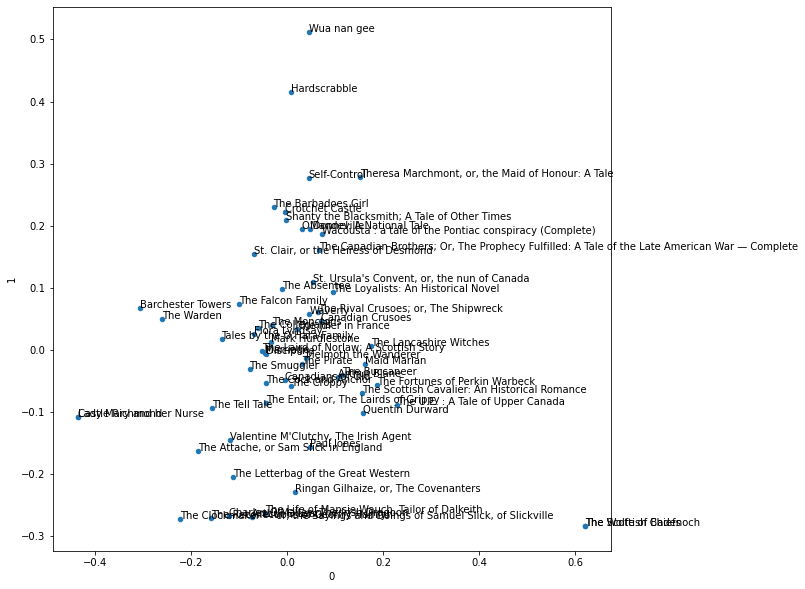

In [48]:
df = pd.DataFrame(corpFreqReduced, index=titles)
ax = df.plot(kind='scatter', x=0, y=1, figsize=(10,10))

for title, points in df.iterrows():
    ax.annotate(title, points)

In [55]:
import numpy as np

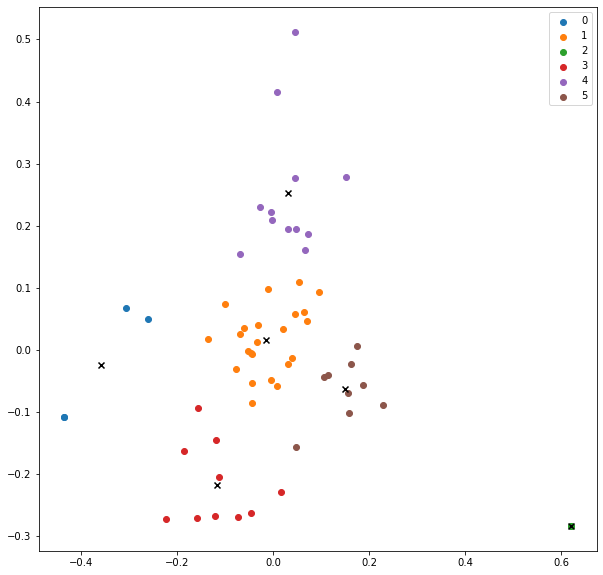

In [56]:
K= 6

kmeans_model = KMeans(n_clusters=K)


kmeans = kmeans_model.fit(corpFreqReduced)


labels = kmeans.predict(corpFreqReduced)


centers = kmeans.cluster_centers_

model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(corpFreqReduced)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(corpFreqReduced[label == i , 0] , corpFreqReduced[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import csv
from collections import Counter
import numpy as np
import pandas as pd

In [126]:
num_components=10

In [127]:
model=LatentDirichletAllocation(n_components=num_components,learning_method='online', learning_offset=50.,random_state=0)
lda_matrix = model.fit_transform(corpusFreq)
lda_components = model.components_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:806: RuntimeWarning: overflow encountered in exp
  return np.exp(-1.0 * perword_bound)


In [116]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [128]:
terms = tf_vectorizer.get_feature_names()

In [129]:
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['tjiat', 'ridicules', 'tellingwhich', 'worldscotland', 'bankwho', 'muchnessnear', 'tableof']
Topic 1:  ['variesbe', 'mentioningto', 'youthone', 'ruffianlooking', 'temperfelt', 'ballastthanks', 'housekeeperindeed']
Topic 2:  ['brightyellow', 'apenniless', 'eleanorfrom', 'terribleterrible', 'thosesisters', 'heardthoroughly', 'gauloises']
Topic 3:  ['andreturn', 'andwishes', 'sing', 'notvengeanceon', 'hisknowledge', 't0', 'soothand']
Topic 4:  ['said', 'ofmoors', 'highlandsagainst', 'regoing', 'shouldersmeanwhile', 'robertsummers', 'rl']
Topic 5:  ['masterotherwise', 'directionlaura', 'erupit', 'thisextraordinary', 'calmtonemy', 'eightfor', 'irresistiblehumour']
Topic 6:  ['said', 'man', 's', 'old', 'little', 'mr', 'time']
Topic 7:  ['ohanlonwithout', 'tyranny', 'street1857contentschaptersprefacechapter', 'thatswallowed', 'emetic', 'whoneither', 'orstop']
Topic 8:  ['meansrather', 'termmuch', 'akinto', 'ghoststhat', 'grizzyseated', 'beendangeredof', 'strangerhelping']
Topic 9: 

# steps 

- write function that will take url gutenberg url and pull texts into DF with date, title, author, location, text
- figure out how to get publication location information....
- separate dataframes by nation
- comparative stylometry
- map geographic distance using altair 
- else?

In [81]:
! pip install altair vega_datasets

Error processing line 1 of /opt/anaconda3/lib/python3.8/site-packages/protobuf-3.14.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "/opt/anaconda3/lib/python3.8/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
     |████████████████████████████████| 812 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 145 kB/s eta 0:00:01


In [82]:
import altair as alt

In [5]:
download = requests.get('http://corpus-db.org/api/author/Maturin, Charles Robert')

In [6]:
parseddownload = json.loads(download.text) # JSON DATA

In [18]:
maturinCorpus = parseddownload


In [77]:
download2 = requests.get('http://corpus-db.org/api/author/Traill, Catharine Parr Strickland')
parseddownload2 = json.loads(download2.text) # JSON DATA
traillCorpus = parseddownload2

In [30]:
MCIDs = [book['id'] for book in maturinCorpus]
TCIDs = [book['id'] for book in traillCorpus]

In [21]:
def plaintext(bookid):
    response = requests.get(f'http://corpus-db.org/api/id/{bookid}/fulltext')
    if response.ok:
        bookText = json.loads(response.text)
        return bookText[0]['text']
    else:
        print('not ok')

In [33]:
traillTexts = []
for bookid in TCIDs:
    traillTexts.append(plaintext(bookid))

In [41]:
traillTitles = [book['title'] for book in traillCorpus]
traillDates = [book['publication_date'] for book in traillCorpus]

In [60]:
traill_df = pd.DataFrame()
traill_df['ID'] = TCIDs
traill_df['Text'] = traillTexts
traill_df['Titles'] = traillTitles
traill_df['Date'] = traillDates

In [61]:
traill_df

,ID,Text,Titles,Date
0,6479.0,Charles Franks and the Online Distributed Proo...,"Lady Mary and her Nurse; Or, a Peep into the C...",
1,6813.0,Charles Franks and the Online Distributed Proo...,Lost in the Backwoods: A Tale of the Canadian ...,
2,8382.0,\n\n\n\n\n\nCANADIAN CRUSOES.\n\nA TALE OF THE...,Canadian Crusoes: A Tale of The Rice Lake Plains,
3,8607.0,"Franks, and the Online Distributed Proofreadin...","In the Forest; Or, Pictures of Life and Scener...",
4,13559.0,\n\n\n\nB A C K W O O D S O F C A N A D A\...,The Backwoods of Canada: Being Letters From Th...,
5,27239.0,the Online Distributed Proofreading Team at\nh...,Little Downy: The History of A Field-Mouse,


In [62]:
traill_df['Date'][0] = 1856

In [64]:
traill_df['Date'][1] = 1858

In [65]:
traill_df

,ID,Text,Titles,Date
0,6479.0,Charles Franks and the Online Distributed Proo...,"Lady Mary and her Nurse; Or, a Peep into the C...",1856
1,6813.0,Charles Franks and the Online Distributed Proo...,Lost in the Backwoods: A Tale of the Canadian ...,1858
2,8382.0,\n\n\n\n\n\nCANADIAN CRUSOES.\n\nA TALE OF THE...,Canadian Crusoes: A Tale of The Rice Lake Plains,
3,8607.0,"Franks, and the Online Distributed Proofreadin...","In the Forest; Or, Pictures of Life and Scener...",
4,13559.0,\n\n\n\nB A C K W O O D S O F C A N A D A\...,The Backwoods of Canada: Being Letters From Th...,
5,27239.0,the Online Distributed Proofreading Team at\nh...,Little Downy: The History of A Field-Mouse,


In [66]:
traill_df['Date'][2] = 1852
traill_df['Date'][3] = 1869
traill_df['Date'][4] = 1836
traill_df['Date'][5] = 1822

In [76]:
traill_df.set_index('Date')

,ID,Text,Titles
Date,,,
1856,6479.0,Charles Franks and the Online Distributed Proo...,"Lady Mary and her Nurse; Or, a Peep into the C..."
1858,6813.0,Charles Franks and the Online Distributed Proo...,Lost in the Backwoods: A Tale of the Canadian ...
1852,8382.0,\n\n\n\n\n\nCANADIAN CRUSOES.\n\nA TALE OF THE...,Canadian Crusoes: A Tale of The Rice Lake Plains
1869,8607.0,"Franks, and the Online Distributed Proofreadin...","In the Forest; Or, Pictures of Life and Scener..."
1836,13559.0,\n\n\n\nB A C K W O O D S O F C A N A D A\...,The Backwoods of Canada: Being Letters From Th...
1822,27239.0,the Online Distributed Proofreading Team at\nh...,Little Downy: The History of A Field-Mouse


In [92]:
sys.path.append(os.path.join(path_gutenberg,'src'))
from metaquery import meta_query
mq = meta_query(path=os.path.join(path_gutenberg,'metadata','metadata.csv'))
mq.df.head() 

ModuleNotFoundError: No module named 'metaquery'

In [93]:
traillCorpus

[{'lcsh': "{'Indian embroidery -- North America -- Juvenile fiction', 'Canada -- Juvenile fiction', 'Birds -- Juvenile fiction', 'Children -- Conduct of life -- Juvenile fiction', 'Rivers -- Juvenile fiction', 'Frontier and pioneer life -- Ontario -- Juvenile fiction', 'Nature stories', 'Animals -- Juvenile fiction', 'Outdoor life -- Juvenile fiction', 'Indians of North America -- Juvenile fiction', 'Conduct of life -- Juvenile fiction'}",
  'summary': '',
  'series_note': '',
  'creator': "{'author': {'agent_name': 'Traill, Catharine Parr Strickland', 'aliases': ['Traill, Mrs.', 'Traill, Catherine Parr'], 'birthdate': 1802, 'deathdate': 1899, 'gutenberg_agent_id': '2715', 'url': 'http://www.gutenberg.org/2009/agents/2715', 'wikipedia': 'http://en.wikipedia.org/wiki/Catharine_Parr_Traill'}}",
  'production_note': '',
  'downloads': '10',
  'rights_url': 'http://creativecommons.org/about/pdm',
  'wp_publication_date': '',
  'authoryearofdeath': '1899',
  '_repo': 'Lady-Mary-and-her-Nurs

In [ ]:
? 